# Gyroscope Movement Data Analysis
In this notebook, we analyze the raw movement data collected by the Arduino and gyroscope unit.

## Setup
Import packages.

In [1]:
!jt -t grade3

In [2]:
import datetime
import serial
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

Initialize config variables.

In [3]:
serial_port = "/dev/cu.usbmodem14301" # Specify Arduino serial port
baud_rate = 9600 # Specify Arduino baud rate
csv_filename = "output.csv" # Specify CSV output file name

features = ["AcclX", "AcclY", "AcclZ", "GyroX", "GyroY", "GyroZ", "AcclAngleX",
                     "AcclAngleY", "GyroAngleX", "GyroAngleY", "GyroAngleZ", "AngleX", "AngleY", "AngleZ", "Time"]

## Start Serial Monitor
Start the Arduino serial monitor below to begin collecting live data.

In [4]:
numerical_serial_data = []
csv_serial_data = []
arduino = serial.Serial(serial_port, baud_rate, timeout=0.1)

t_end = time.time() + 3600
arduino.reset_input_buffer()
while time.time() < t_end:
    serial_data_line = arduino.readline().decode('utf-8').strip()
    time.sleep(0.05)
    serial_data_entry = serial_data_line.split(",")
    if len(serial_data_entry) == 15:
        if serial_data_entry[-1] != "Time": numerical_serial_data.append(serial_data_entry)
        try: timestamp = datetime.timedelta(milliseconds=float(serial_data_entry[-1]))
        except ValueError: timestamp = -1.
        csv_serial_data.append(serial_data_line)
        print("[{}]: {}".format(timestamp, serial_data_line))

[-1.0]: AcclX,AcclY,AcclZ,GyroX,GyroY,GyroZ,AcclAngleX,AcclAngleY,GyroAngleX,GyroAngleY,GyroAngleZ,AngleX,AngleY,AngleZ,Time
[0:00:07.469000]: 0.21,0.31,0.74,27.67,-35.96,-26.12,21.79,-14.44,203.90,-264.99,-192.46,229.38,-262.07,-192.46,7469
[0:00:07.571000]: 0.03,0.54,0.78,12.69,-14.22,-4.32,34.73,-1.69,205.23,-266.49,-192.91,226.79,-258.33,-192.91,7571
[0:00:07.671000]: 0.06,0.62,0.72,4.14,-43.04,-8.33,40.66,-3.64,205.65,-270.83,-193.75,223.48,-257.49,-193.75,7671
[0:00:07.773000]: 0.12,0.62,0.72,5.70,-28.08,-5.95,40.15,-7.01,206.23,-273.70,-194.36,220.38,-255.29,-194.36,7773
[0:00:07.876000]: -0.23,0.86,0.62,12.71,-19.04,-19.75,52.33,12.09,207.51,-275.60,-196.34,218.27,-251.81,-196.34,7876
[0:00:07.979000]: -0.80,1.19,0.27,-44.22,73.47,3.50,54.43,33.46,202.91,-267.96,-195.97,210.48,-238.62,-195.97,7979
[0:00:08.082000]: -0.04,0.45,1.25,-31.67,-40.85,-32.61,19.72,1.60,199.68,-272.13,-199.30,203.50,-237.89,-199.30,8082
[0:00:08.182000]: 0.10,0.14,1.01,10.05,40.21,11.09,7.86,-5.59,200.

KeyboardInterrupt: 

## Visualize Data
Visualize the collected data.

### All Features
Visualize all features in one plot.

In [5]:
serial_matrix = np.array(numerical_serial_data).astype(float) # Initialize data matrix

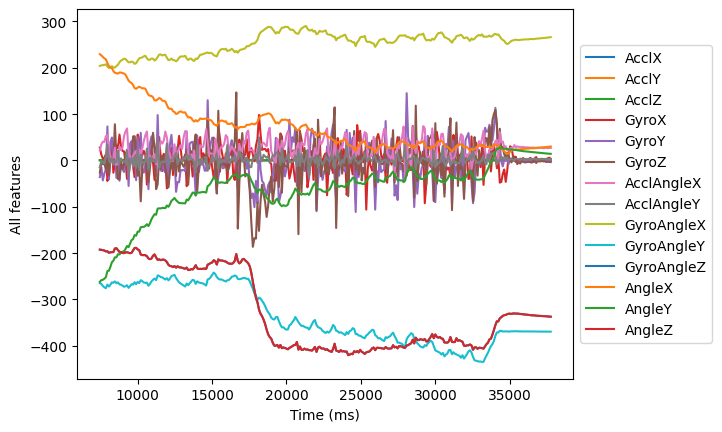

In [6]:
x_time = serial_matrix[:, -1]
y_all_features = serial_matrix[:, :-1]
plt.plot(x_time, y_all_features, label=features[:-1])
plt.xlabel("Time (ms)")
plt.ylabel("All features")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

### Selected Feature
Select a specific feature to visualize.

In [9]:
feature_index_widget = widgets.Dropdown(
    options=features,
    description="Feature:"
)

feature_index_widget

Dropdown(description='Feature:', options=('AcclX', 'AcclY', 'AcclZ', 'GyroX', 'GyroY', 'GyroZ', 'AcclAngleX', …

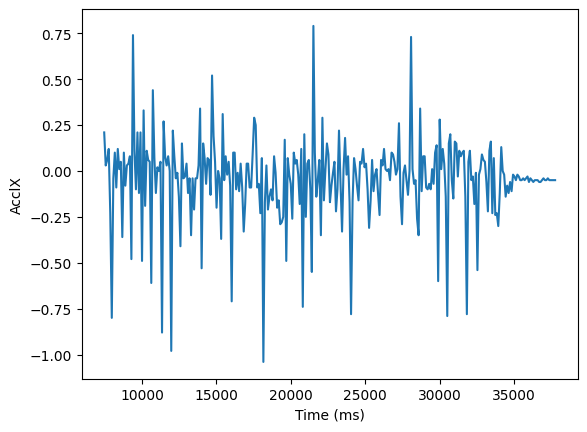

In [10]:
selected_feature_index = features.index(feature_index_widget.value)

y_feature = serial_matrix[:, selected_feature_index]
plt.plot(x_time, y_feature)
plt.xlabel("Time (ms)")
plt.ylabel(features[selected_feature_index])
plt.show()

## Generate CSV File
Generate a CSV file from the collected data.

In [11]:
with open(csv_filename, "w", newline ='') as csv_file:
    writer = csv.writer(csv_file)
    if csv_serial_data[0][-4:] != "Time":
        writer.writerow([",".join(features)])
    for row in csv_serial_data:
        writer.writerow([row])